# Introduction/Business Problem 

Madrid is the capital of Spain and the most populous city in the country that has an 
expanding metropolitan area that includes more than 6.5 million inhabitants that place it 
among the top 5 of the European Union. 

It is a city with a long history and therefore its morphology has evolved through the ages. 
It presents a great variety of urban paths. It is divided into districts, which are subdivided 
into neighborhoods. It has 21 districts and 131 neighborhoods. 

The personal transport vehicle has been one of the distinctive elements of urban transport 
due to the dispersion of the population and the historical difficulties in accessing work 
and leisure centers by public transport. The city traffic jams are famous. 

In recent years, sustainable mobility plans have been enhanced to facilitate the lives of its 
citizens and help prevent climate change. 

One of the key elements in this new mobility model is personal transport using electric 
vehicles, which enjoy great environmental and fiscal advantages. 

The objective of this project is to analyze the charging points of electric vehicles available 
in the city of Madrid, to help an investor find the best location between the neighborhoods 
of Madrid to install a new charging point. 

**Approach**

- Collect the Madrid city data from ttps://es.wikipedia.org/wiki/Madrid#Distritos 
- Collect the Madrid station charge of electrical vehicles from Google Earth. 
- Using FourSquare API we will find all venues for each station charging. 
- Using FourSquare API we will find all venues for each neighborhood. 
- Cluster the data to find the ideal location of a charging station. 

Questions that can be asked using the above mentioned datasets 
- What is best location in Madrid for stations charging electrical vehicles? 
- Which areas have potential station charging electrical vehicles market? 

# <b>Part 1 : DATA. 

</b>

For this project we need the following data: 

- Data of the city of Madrid containing the list of Districts and neighborhoods 
containing their latitude and longitude. 
   - Data source: https://es.wikipedia.org/wiki/Madrid#Distritos 
   - Description: On this page we find the list of districts and neighborhoods 
linking each of them a page with their geographical data. 
- Electric vehicle charging points in the city of Madrid. 
   - Data Source: Gogle Earth Pro. Search “electric vehicle charging station 
madrid”. Provide the kml file <a href="https://github.com/ogarciaf/Coursera_Capstone/blob/e707eb5dda6ac7b50495a1181d427baaa91ea5f7/estacion%20de%20carga%20de%20vehiculos%20electrico%20madrid.kml">charging stations</a>
   - Description: Using Google Earth we can download a file in kml format 
with the location of the current charging points. A kml file is an xml file 
that contains the coordinates of the current points. 
- Places near each charging station. 
   - Data Source: Foursquare API 
   - Description: By using this api we will get all the venues in each 
neighborhood. We will use these places to look for patterns in current 
locations and apply those patterns to find new locations. 

## Get the data

In [3]:
import requests
import pandas as pd

#uncomment this line on error 
!pip install bs4
from bs4 import BeautifulSoup
#uncomment this line on error 
!pip install wikipedia
import wikipedia as wp
print('Libraries imported.')

     |████████████████████████████████| 102kB 19.2MB/s ta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
Libraries imported.


In [119]:
website_url = requests.get('https://es.wikipedia.org/wiki/Madrid#Distritos').text
#website_url

Reading the web page.

In [120]:
#convert the request
soup = BeautifulSoup(website_url, 'html.parser')
#print(soup.prettify())               #Uncomment if you want to see the data

The page has a section with an ordered list of districts. Their neighborhoods are listed next to each district.

In [121]:
listas = soup.find_all('ol')

The list of Districts corresponds to the first list that appears on the page.

In [122]:
listas[0] 

<ol><li><b><a href="/wiki/Centro_(Madrid)" title="Centro (Madrid)">Centro</a>.</b> <a href="/wiki/Palacio_(Madrid)" title="Palacio (Madrid)">Palacio</a>, <a href="/wiki/Embajadores_(Madrid)" title="Embajadores (Madrid)">Embajadores</a>, <a href="/wiki/Cortes_(Madrid)" title="Cortes (Madrid)">Cortes</a>, <a href="/wiki/Justicia_(Madrid)" title="Justicia (Madrid)">Justicia</a>, <a class="mw-redirect" href="/wiki/Malasa%C3%B1a" title="Malasaña">Universidad</a> y <a href="/wiki/Sol_(Madrid)" title="Sol (Madrid)">Sol</a>.</li>
<li><b><a href="/wiki/Arganzuela" title="Arganzuela">Arganzuela</a>.</b> <a class="mw-redirect" href="/wiki/Imperial_(Arganzuela)" title="Imperial (Arganzuela)">Imperial</a>, <a class="mw-redirect" href="/wiki/Las_Acacias" title="Las Acacias">Acacias</a>, <a class="mw-redirect" href="/wiki/La_Chopera" title="La Chopera">La Chopera</a>, <a href="/wiki/Legazpi_(Madrid)" title="Legazpi (Madrid)">Legazpi</a>, <a class="mw-redirect" href="/wiki/Las_Delicias_(Madrid)" title

We access one of the linked pages and retrieve its content to read the coordinates.

In [123]:
urlwikipage ='https://es.wikipedia.org' + '/wiki/Arapiles_(Madrid)'
wikipage_url = requests.get(urlwikipage).text
wikipage_url
#convert the request
soupwiki = BeautifulSoup(wikipage_url, 'html.parser')

The location, latitude and longitude, is in a link to another page. We locate the links that have the same class.

<span class="latitude">40.470196, </span><span class="longitude">-3.58489</span>

In [124]:
celdaCoords=soupwiki.find_all('a',{"class":"external text"})


In [125]:
celdaCoords[1]

<a class="external text" href="http://tools.wmflabs.org/geohack/geohack.php?language=es&amp;pagename=Arapiles_(Madrid)&amp;params=40.43416667_N_-3.70777778_E_type:city"><span class="geo-default"><span class="geo-dms" title="Mapas, fotos y otros datos de 40°26′03″N 3°42′28″O"><span class="latitude">40°26′03″N </span><span class="longitude">3°42′28″O</span></span></span><span class="geo-multi-punct">﻿ / ﻿</span><span class="geo-nondefault"><span class="geo-dec" title="Mapas, fotos y otros datos de 40.43416667 -3.70777778"><span class="geo"><span class="latitude">40.43416667, </span><span class="longitude">-3.70777778</span></span></span></span></a>

In [126]:
latitud=float(celdaCoords[1].find_all('span',{"class":"latitude"})[1].text.split(',')[0])
print(latitud)

40.43416667


In [127]:
longitud=float(celdaCoords[1].find_all('span',{"class":"longitude"})[1].text.split(',')[0])
print(longitud)

-3.70777778


Once we have identified the processes of the data source pages, we will recover the data of each District and its neighborhoods iterating from the initial page to create a dataframe with the coordinates.

In [128]:
rows=[]
for distritos in listas[0].find_all('li'):
    distri=0
    for distrito in distritos.find_all('a'):
        print(distrito.get('title'))
        urlwikipage ='https://es.wikipedia.org' + distrito.get('href')
        wikipage_url = requests.get(urlwikipage).text
        soupwiki = BeautifulSoup(wikipage_url, 'html.parser')
        celdaCoords=soupwiki.find_all('a',{"class":"external text"})
        try:
            latitud=float(celdaCoords[0].find_all('span',{"class":"latitude"})[1].text.split(',')[0])
            longitud=float(celdaCoords[0].find_all('span',{"class":"longitude"})[1].text.split(',')[0])
        except:
            try:
                latitud=float(celdaCoords[1].find_all('span',{"class":"latitude"})[1].text.split(',')[0])
                longitud=float(celdaCoords[1].find_all('span',{"class":"longitude"})[1].text.split(',')[0])
            except:
                latitud=0
                longitud=0
        if distri==0:
            #print('Distrito:',distrito.get('href'),distrito.get('title'))
            rows.append([distrito.get('title'),distrito.get('href'),'Distrito', latitud, longitud])
        else:
            #print('Barrio:',distrito.get('href'),distrito.get('title'))
            rows.append([distrito.get('title'),distrito.get('href'),'Barrio', latitud, longitud])
        distri +=1

Centro (Madrid)
Palacio (Madrid)
Embajadores (Madrid)
Cortes (Madrid)
Justicia (Madrid)
Malasaña
Sol (Madrid)
Arganzuela
Imperial (Arganzuela)
Las Acacias
La Chopera
Legazpi (Madrid)
Las Delicias (Madrid)
Palos de Moguer (Madrid)
Atocha (Madrid)
Retiro (Madrid)
Pacífico (Madrid)
Adelfas
Estrella (Madrid)
Ibiza (Madrid)
Jerónimos (Madrid)
Niño Jesús (Madrid)
Salamanca (Madrid)
Recoletos (Madrid)
Goya (Madrid)
Fuente del Berro (Madrid)
Guindalera
Lista (Madrid)
Castellana (Madrid)
Chamartín
Colonia de El Viso
Prosperidad (Madrid)
Ciudad Jardín (Madrid)
Hispanoamérica (Madrid)
Nueva España (Madrid)
Castilla (Madrid)
Tetuán (Madrid)
Bellas Vistas
Cuatro Caminos (Madrid)
Castillejos (Madrid)
Almenara (Madrid)
Valdeacederas
Berruguete (Madrid)
Chamberí
Gaztambide (Madrid)
Arapiles (Madrid)
Trafalgar (Madrid)
Almagro (Madrid)
Ríos Rosas (Madrid)
Vallehermoso (Madrid)
Fuencarral-El Pardo
El Pardo (Madrid)
Fuentelarreina
Peñagrande
Barrio del Pilar (Madrid)
La Paz (Madrid)
Valverde (Madrid)
Mir

In [129]:
listado=pd.DataFrame(rows) 
listado.columns=['Name','link','Type','latitude','longitude']
print(listado.shape)
listado=listado[listado['latitude']!=0]
print(listado.shape)

(152, 5)
(151, 5)


We save the dataframe in a csv file for later use.

In [130]:
listado.to_csv('barrios.csv',index=False)

Once downloaded to the csv, the data can be recovered:

In [4]:
listado = pd.read_csv('barrios.csv')
listado.head()

,Name,link,Type,latitude,longitude
0,Centro (Madrid),/wiki/Centro_(Madrid),Distrito,40.415347,-3.707371
1,Palacio (Madrid),/wiki/Palacio_(Madrid),Barrio,40.415000,-3.713333
2,Embajadores (Madrid),/wiki/Embajadores_(Madrid),Barrio,40.408889,-3.699722
3,Cortes (Madrid),/wiki/Cortes_(Madrid),Barrio,40.414167,-3.698056
4,Justicia (Madrid),/wiki/Justicia_(Madrid),Barrio,40.423889,-3.696389


Madrid location:

In [5]:
latitudMadrid=40.418889
longitudMadrid=-3.691944

In [6]:
listadobarrios=listado[listado['Type']=='Barrio'].reset_index()
listadoDistritos=listado[listado['Type']=='Distrito'].reset_index()

We prepare to visualize the location of each District, Neighborhood and charging station in Madrid

In [7]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
map_madrid = folium.Map(location=[latitudMadrid, longitudMadrid], zoom_start=11)

We load the placeholders of the Districts ...

In [8]:
# add Distrito markers to map
for lat, lng, label in zip(listadoDistritos['latitude'], listadoDistritos['longitude'], listadoDistritos['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF5733',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  

We load the placeholders of each neighborhood ...

In [9]:
# add markers to map
for lat, lng, label in zip(listadobarrios['latitude'], listadobarrios['longitude'], listadobarrios['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    

In [10]:
map_madrid

### We retrieve the location data of the charging stations.

We downloaded the KML file from Google Earth with the export of the search "estación carga vehículo eléctrico madrid".

We read the file from the local route where we have saved it:

In [138]:
import xml.etree.ElementTree as ET

pathtokml='estacion de carga de vehiculos electrico madrid.kml'
tree=ET.parse(pathtokml)

To extract the location data of each charging station we locate the element {http://www.opengis.net/kml/2.2}Placemark that contains the latitude and longitude data.

In [139]:
places=tree.findall('.//{http://www.opengis.net/kml/2.2}Placemark')

We create a dictionary with the Placemark elements and their properties.

In [140]:
places[0].findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[0]
places[0].findall('.//{http://www.opengis.net/kml/2.2}name')[0].text.split(',')[0]


'Punto de recarga de Vehículos Eléctricos'

In [141]:
elementos=[]
for place in places:
    latitud=float(place.findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[1])
    longitud=float(place.findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[0])
    nombre=place.findall('.//{http://www.opengis.net/kml/2.2}name')[0].text.split(',')[0]
    direccion=place.findall('.//{http://www.opengis.net/kml/2.2}address')[0].text.split(',')[0]
    elementos.append([nombre,direccion,latitud,longitud])

stations=pd.DataFrame(elementos) 
stations.columns=['Name','Address','latitude','longitude']
stations

,Name,Address,latitude,longitude
0,Punto de recarga de Vehículos Eléctricos,28046 Madrid,40.431880,-3.689155
1,Enchufauto,Calle de Diego de León,40.434853,-3.678520
2,Recarga eléctrica de coches y motos,Calle de Alfonso XII,40.419270,-3.688927
3,Recarga eléctrica de coches,Paseo de la Castellana,40.458343,-3.689345
4,Recarga eléctrica de coches,Calle de los Chulapos,40.407397,-3.720168
5,Punto de Carga para Vehiculo Eléctrico Sta. En...,Calle de Sta Engracia,40.438250,-3.700276
6,Recarga eléctrica de coches y motos,Calle de Goya,40.424696,-3.671250
7,Punto de Carga Vehículos Eléctricos,Parking ifema,40.464751,-3.618176
8,Punto de recarga Vehículo Eléctrico,Calle de San Bernardo,40.427178,-3.706448


We load the placeholders of each charging station ...

In [142]:
# add markers to map
for lat, lng, label in zip(stations['latitude'], stations['longitude'], stations['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#4FFF33',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    

In [143]:
map_madrid

### Explore the neighborhoods in Madrid

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [144]:
VERSION = '20180605' # Foursquare API version

CLIENT_ID = 'myclientid'
CLIENT_SECRET = 'myClientSecret'


#### Let's explore the first neighborhood in our dataframe.

In [145]:
listadobarrios.loc[0,'Name']

'Palacio (Madrid)'

Get the neighborhood's latitude and longitude values.

In [146]:
neighborhood_latitude = listadobarrios.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = listadobarrios.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = listadobarrios.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Palacio (Madrid) are 40.415, -3.71333333.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [147]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    500, 
    100)


url

'https://api.foursquare.com/v2/venues/explore?&client_id=DPQJAJTCGDD4023TRPCVLR5FLNABK1LEUIJCDVA4AQTQEYQ3&client_secret=TFW0DW2XXGO1DRA2JD3OUNQV1PONCDMMXAN1KSKF3R3GAEWI&v=20180605&ll=40.415,-3.71333333&radius=500&limit=100'

In [148]:
results = requests.get(url).json()

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [149]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [150]:
results

{'meta': {'code': 200, 'requestId': '5dc43aace97dfb002c18cea2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'La Latina',
  'headerFullLocation': 'La Latina, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 139,
  'suggestedBounds': {'ne': {'lat': 40.4195000045, 'lng': -3.7074339503134666},
   'sw': {'lat': 40.4104999955, 'lng': -3.719232709686534}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda38f964a520523c21e3',
       'name': 'Santa Iglesia Catedral de Santa María la Real de la Almudena (Catedral de la Almudena)',
       'location': {'address': 'C. Bailén, 8-10',
        'lat': 40.41576693264202,
        'lng': -3.7145161628723145,
        '

In [151]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Santa Iglesia Catedral de Santa María la Real ...,Church,40.415767,-3.714516
1,Cervecería La Mayor,Beer Bar,40.415218,-3.712194
2,Plaza de La Almudena,Plaza,40.416320,-3.713777
3,Mercado Jamón Iberico,Market,40.415309,-3.711633
4,Taberna Rayuela,Tapas Restaurant,40.413179,-3.713496


In [152]:
nearby_venues

,name,categories,lat,lng
0,Santa Iglesia Catedral de Santa María la Real ...,Church,40.415767,-3.714516
1,Cervecería La Mayor,Beer Bar,40.415218,-3.712194
2,Plaza de La Almudena,Plaza,40.416320,-3.713777
3,Mercado Jamón Iberico,Market,40.415309,-3.711633
4,Taberna Rayuela,Tapas Restaurant,40.413179,-3.713496
...,...,...,...,...
95,La Taquería de Birra,Mexican Restaurant,40.411605,-3.713569
96,Taquería Mi Ciudad,Mexican Restaurant,40.416927,-3.708488
97,Taberna del Capitán Alatriste,Spanish Restaurant,40.412623,-3.708385
98,La Mordida De Segovia,Mexican Restaurant,40.413766,-3.711112


And how many venues were returned by Foursquare?

In [153]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Exploring all Neighborhoods in Madrid

Let's create a function to repeat the same process to all the neighborhoods in Madrid

In [154]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
    LIMIT=limit
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called *madrid_venues*.

In [155]:
madrid_venues = getNearbyVenues(names=listadobarrios['Name'],
                                   latitudes=listadobarrios['latitude'],
                                   longitudes=listadobarrios['longitude']
                                  )

Palacio (Madrid)
Embajadores (Madrid)
Cortes (Madrid)
Justicia (Madrid)
Malasaña
Sol (Madrid)
Imperial (Arganzuela)
Las Acacias
La Chopera
Legazpi (Madrid)
Las Delicias (Madrid)
Palos de Moguer (Madrid)
Atocha (Madrid)
Pacífico (Madrid)
Adelfas
Estrella (Madrid)
Ibiza (Madrid)
Jerónimos (Madrid)
Niño Jesús (Madrid)
Recoletos (Madrid)
Goya (Madrid)
Fuente del Berro (Madrid)
Guindalera
Lista (Madrid)
Castellana (Madrid)
Colonia de El Viso
Prosperidad (Madrid)
Ciudad Jardín (Madrid)
Hispanoamérica (Madrid)
Nueva España (Madrid)
Castilla (Madrid)
Bellas Vistas
Cuatro Caminos (Madrid)
Castillejos (Madrid)
Almenara (Madrid)
Valdeacederas
Berruguete (Madrid)
Gaztambide (Madrid)
Arapiles (Madrid)
Trafalgar (Madrid)
Almagro (Madrid)
Ríos Rosas (Madrid)
Vallehermoso (Madrid)
El Pardo (Madrid)
Fuentelarreina
Peñagrande
Barrio del Pilar (Madrid)
La Paz (Madrid)
Valverde (Madrid)
Mirasierra
Casa de Campo
Argüelles (Madrid)
Ciudad Universitaria de Madrid
Valdezarza
Valdemarín
El Plantío
Aravaca
Los 

In [156]:
madrid_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio (Madrid),40.415000,-3.713333,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio (Madrid),40.415000,-3.713333,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
2,Palacio (Madrid),40.415000,-3.713333,Plaza de La Almudena,40.416320,-3.713777,Plaza
3,Palacio (Madrid),40.415000,-3.713333,Mercado Jamón Iberico,40.415309,-3.711633,Market
4,Palacio (Madrid),40.415000,-3.713333,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
...,...,...,...,...,...,...,...
3672,Corralejos,40.464444,-3.590000,Restaurante Asiático Hong Yun,40.462819,-3.591709,Asian Restaurant
3673,Corralejos,40.464444,-3.590000,Pizzamascalzone,40.465177,-3.592820,Pizza Place
3674,Corralejos,40.464444,-3.590000,"Alimentación, pan, bebida y frutos secos",40.462925,-3.592227,Food & Drink Shop
3675,Corralejos,40.464444,-3.590000,Mercadona,40.465216,-3.592730,Supermarket


In [157]:
madrid_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Adelfas,36,36,36,36,36,36
Aeropuerto (Madrid),19,19,19,19,19,19
Alameda de Osuna,26,26,26,26,26,26
Almagro (Madrid),75,75,75,75,75,75
Almenara (Madrid),4,4,4,4,4,4
...,...,...,...,...,...,...
Valverde (Madrid),2,2,2,2,2,2
Ventas (Madrid),21,21,21,21,21,21
Villaverde Alto (Madrid),4,4,4,4,4,4


We save the dataframe in a file for later use.

In [158]:
madrid_venues.to_csv('madrid_venues.csv',index=False)

#### Now we write the code to run the above function on each station and create a new dataframe called *madrid_station_venues*.

In [159]:
madrid_station_venues = getNearbyVenues(names=stations['Name'],
                                   latitudes=stations['latitude'],
                                   longitudes=stations['longitude']
                                  )

Punto de recarga de Vehículos Eléctricos
Enchufauto
Recarga eléctrica de coches y motos
Recarga eléctrica de coches
Recarga eléctrica de coches
Punto de Carga para Vehiculo Eléctrico Sta. Engracia- José Abascal
Recarga eléctrica de coches y motos
Punto de Carga Vehículos Eléctricos
Punto de recarga Vehículo Eléctrico


In [160]:
madrid_station_venues.to_csv('madrid_stations_venues.csv',index=False)

In [161]:
madrid_station_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Enchufauto,81,81,81,81,81,81
Punto de Carga Vehículos Eléctricos,14,14,14,14,14,14
Punto de Carga para Vehiculo Eléctrico Sta. Engracia- José Abascal,66,66,66,66,66,66
Punto de recarga Vehículo Eléctrico,100,100,100,100,100,100
Punto de recarga de Vehículos Eléctricos,100,100,100,100,100,100
Recarga eléctrica de coches,85,85,85,85,85,85
Recarga eléctrica de coches y motos,165,165,165,165,165,165


We already have all the data we need to carry out our study.

# <b> Part 2 : METHODOLOGY  </b>

We want to find the best locations for a new electric vehicle charging station using as a reference the similarity between each neighborhood and the environment of the points where a charging station already exists.

Analyzing the dataframe **madrid_station_venues** we will try to locate the parameters that define a good location.

Then, we will apply those parameters to the set of neighborhoods in Madrid (*madrid_venues*) to obtain its classification.

We load the data from the previously generated csv.

importing modules...

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
madrid_station_venues = pd.read_csv('madrid_stations_venues.csv')
madrid_venues = pd.read_csv('madrid_venues.csv')
print(madrid_venues.head())
print(madrid_station_venues.head())

      Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Palacio (Madrid)                  40.415                -3.713333   
1  Palacio (Madrid)                  40.415                -3.713333   
2  Palacio (Madrid)                  40.415                -3.713333   
3  Palacio (Madrid)                  40.415                -3.713333   
4  Palacio (Madrid)                  40.415                -3.713333   

                                               Venue  Venue Latitude  \
0  Santa Iglesia Catedral de Santa María la Real ...       40.415767   
1                                Cervecería La Mayor       40.415218   
2                               Plaza de La Almudena       40.416320   
3                              Mercado Jamón Iberico       40.415309   
4                                    Taberna Rayuela       40.413179   

   Venue Longitude    Venue Category  
0        -3.714516            Church  
1        -3.712194          Beer Bar  
2        -3.71377

We group the categories of  venues to obtain features that define an environment.

In [13]:
print('There are {} uniques categories in "Train" set.'.format(len(madrid_station_venues['Venue Category'].unique())))
print('There are {} uniques categories in "Prediction" set.'.format(len(madrid_venues['Venue Category'].unique())))

There are 139 uniques categories in "Train" set.
There are 274 uniques categories in "Prediction" set.


### **Analyze Each Charging Station**

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.<br> We also change the Nan by 0.

In [14]:
station_grouped=madrid_station_venues.groupby(['Neighbourhood','Venue Category']).size().reset_index()
station_grouped.columns=['Neighbourhood','Venue Category','Count']
station_grouped=station_grouped.pivot(index='Neighbourhood', columns='Venue Category', values='Count')
station_grouped=station_grouped.fillna(0)


We repeat the same process to obtain the most common  venues in each neighborhood. 


In [15]:
neighborhood_grouped=madrid_venues.groupby(['Neighbourhood','Venue Category']).size().reset_index()
neighborhood_grouped.columns=['Neighbourhood','Venue Category','Count']
neighborhood_grouped=neighborhood_grouped.pivot(index='Neighbourhood', columns='Venue Category', values='Count')
neighborhood_grouped=neighborhood_grouped.fillna(0)

We want to use the data set of the charging stations as a reference to identify the resulting categories after creating the clusters. To homogenize the results we will use the same columns in both data sets.

In [16]:
columnsTrain=set(station_grouped.columns)
columnsTest=set(neighborhood_grouped.columns)
columnsComuns=list(columnsTrain.intersection(columnsTest))
print(columnsComuns)


['Arcade', 'Sports Club', 'Yoga Studio', 'Bistro', 'Sculpture Garden', 'Thai Restaurant', 'Pool', 'Dessert Shop', 'Exhibit', 'Breakfast Spot', 'Deli / Bodega', 'Building', 'Mexican Restaurant', 'Pub', 'Art Museum', 'Burger Joint', 'Theme Restaurant', 'Multiplex', 'Discount Store', 'Cajun / Creole Restaurant', 'Spanish Restaurant', 'Scenic Lookout', 'Italian Restaurant', 'Playground', 'Monument / Landmark', 'Brazilian Restaurant', 'Museum', 'Wine Bar', 'Seafood Restaurant', 'Hobby Shop', 'Japanese Restaurant', 'Office', 'Park', 'Gastropub', 'Peruvian Restaurant', 'Restaurant', 'Pizza Place', 'Coffee Shop', 'Paper / Office Supplies Store', 'Snack Place', 'Casino', 'Hotel', 'Historic Site', 'Public Art', 'Bookstore', 'Cocktail Bar', 'Steakhouse', 'Turkish Restaurant', 'Supermarket', 'Arepa Restaurant', 'Indian Restaurant', 'Paella Restaurant', 'Mobile Phone Shop', 'Coworking Space', 'Science Museum', 'Falafel Restaurant', 'Garden', 'Cafeteria', 'Pastry Shop', 'Department Store', 'History 

In [17]:
neighborhood_grouped=neighborhood_grouped[columnsComuns]
station_grouped=station_grouped[columnsComuns]

We have now two dataframes with identical columns ...

In [18]:
neighborhood_grouped.head()

Venue Category,Arcade,Sports Club,Yoga Studio,Bistro,Sculpture Garden,Thai Restaurant,Pool,Dessert Shop,Exhibit,Breakfast Spot,...,Tapas Restaurant,Clothing Store,Men's Store,General Entertainment,Brewery,Cupcake Shop,Gymnastics Gym,Burrito Place,Tea Room,Gift Shop
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Adelfas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Aeropuerto (Madrid),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alameda de Osuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Almagro (Madrid),0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Almenara (Madrid),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
station_grouped.head()

Venue Category,Arcade,Sports Club,Yoga Studio,Bistro,Sculpture Garden,Thai Restaurant,Pool,Dessert Shop,Exhibit,Breakfast Spot,...,Tapas Restaurant,Clothing Store,Men's Store,General Entertainment,Brewery,Cupcake Shop,Gymnastics Gym,Burrito Place,Tea Room,Gift Shop
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Enchufauto,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Punto de Carga Vehículos Eléctricos,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Punto de Carga para Vehiculo Eléctrico Sta. Engracia- José Abascal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Punto de recarga Vehículo Eléctrico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,6.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
Punto de recarga de Vehículos Eléctricos,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Comparing reference with the raw data of each neighborhood.

Plot the number of venues as boxplots nearby charging station of electrical vehicle.

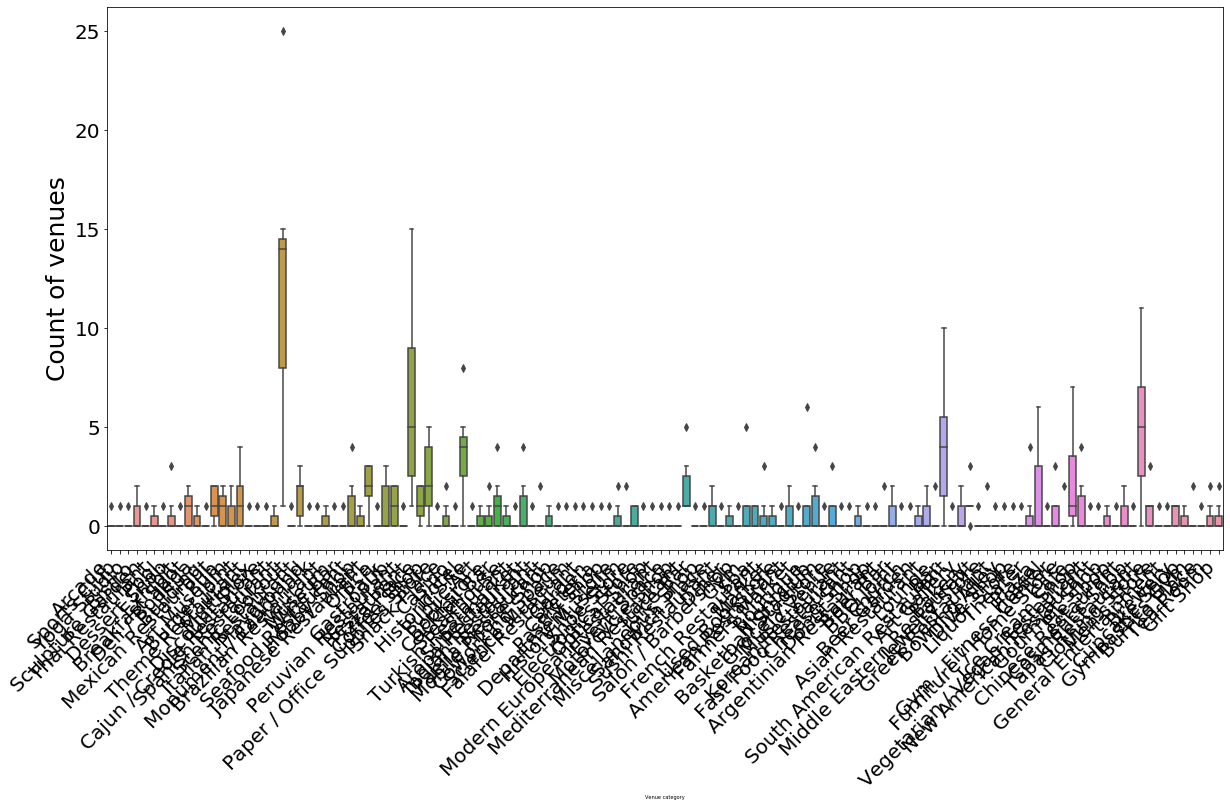

In [20]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = station_grouped)
ax.set_ylabel('Count of venues', fontsize=25)

ax.set_xlabel('Venue category', fontsize=5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

Plot the number of venues as boxplots nearby centroid neighbourhood.

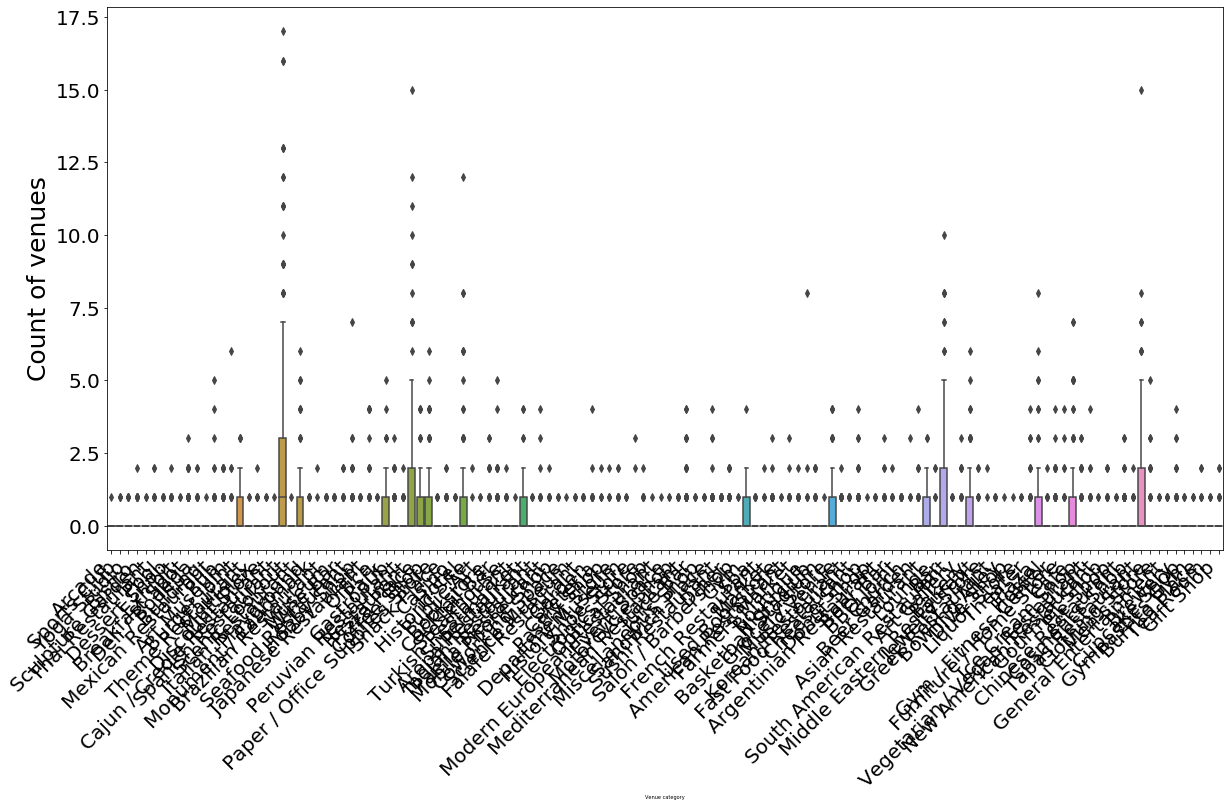

In [21]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = neighborhood_grouped)
ax.set_ylabel('Count of venues', fontsize=25)

ax.set_xlabel('Venue category', fontsize=5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

Looking at this second graph, we can see that only 18 categories appear with sufficient frequency and this categories also take the highest values nearby charging stations of electric vehicles.

We select this categories.

We calculate the average of each column and we are left with the 18 highest values.

In [22]:
station_groupedH=station_grouped.mean(axis = 0, skipna = True).nlargest(18)
#neighborhood_grouped.nlargest(3, neighborhood_grouped.mean(axis = 1, skipna = True))

We convert the resulting series into a dataframe and we are left with the name of the most significant columns.

In [23]:
df = station_groupedH.to_frame().reset_index()

columnasSignificativas=df['Venue Category'].values

We select only those columns and look at the resulting graphs, which now provide more detail.

For each charging station:

In [24]:
station_MoreSignificant=station_grouped[columnasSignificativas]

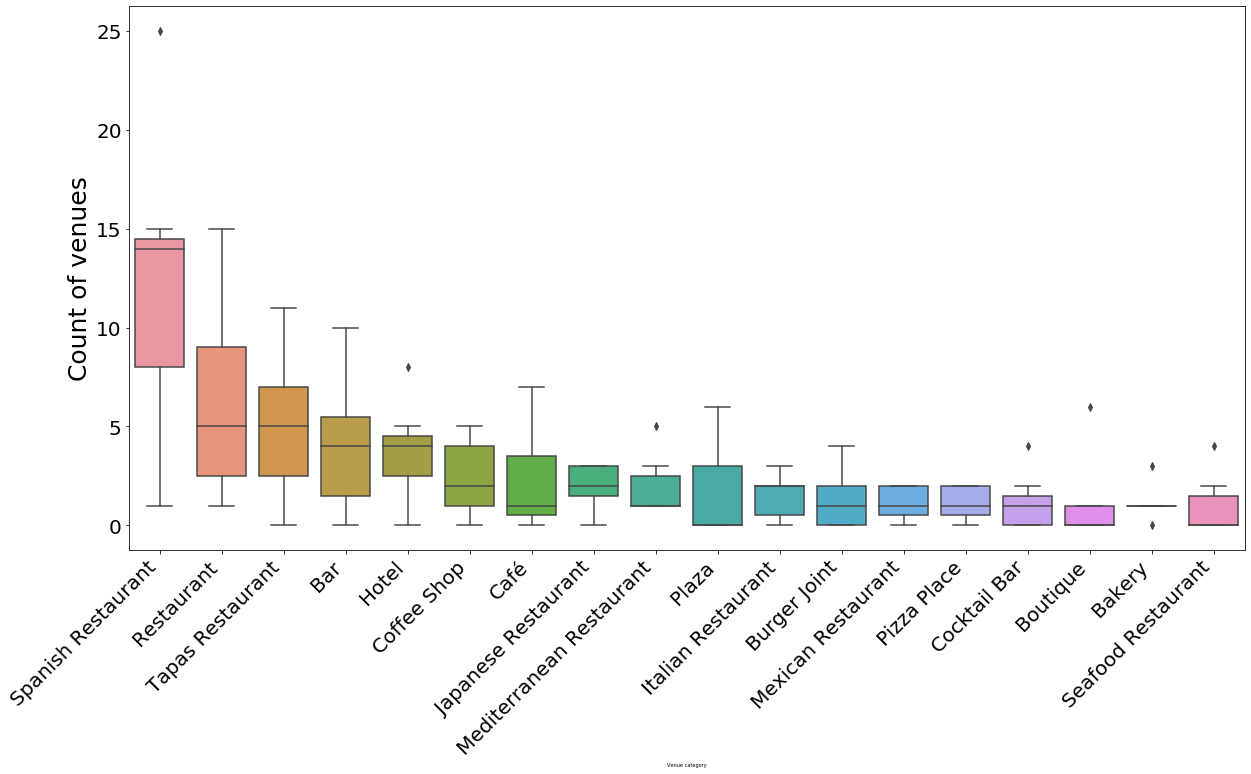

In [25]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = station_MoreSignificant)
ax.set_ylabel('Count of venues', fontsize=25)

ax.set_xlabel('Venue category', fontsize=5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

For each neighbourhood:

In [26]:
neighborhood_MoreSignificant=neighborhood_grouped[columnasSignificativas]

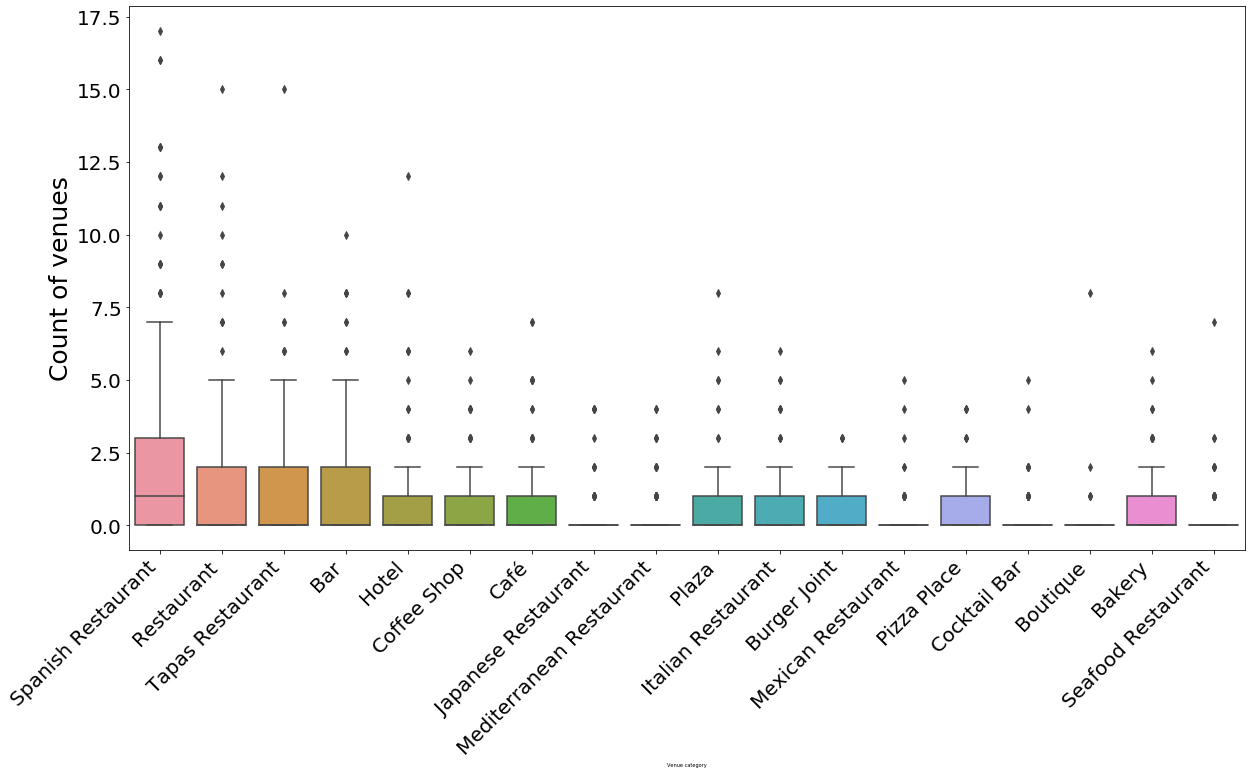

In [27]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = neighborhood_MoreSignificant)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

The location of the electric vehicle charging stations seems to be related to a greater presence of leisure and catering places. It seems logical, because near these places is where there is usually a lot of traffic.

### Data preparation

Let's normalize the data using MinMaxScaler (scale from 0 to 1). This scales the data and provides an easy to interpret score at the same time.

In [28]:
from sklearn.preprocessing import MinMaxScaler

X = neighborhood_MoreSignificant.values  #[:,4:]
cluster_dataset = MinMaxScaler().fit_transform(X)

In [29]:
cluster_dataset
cluster_df = pd.DataFrame(cluster_dataset)
#cluster_df.columns = [c[0] for c in categories_list]
cluster_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.176471,0.066667,0.133333,0.4,0.166667,0.166667,0.142857,0.0,0.0,0.000,0.000000,0.333333,0.0,0.25,0.0,0.0,0.333333,0.0
1,0.117647,0.000000,0.000000,0.0,0.000000,0.333333,0.142857,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0
2,0.058824,0.066667,0.133333,0.1,0.166667,0.166667,0.000000,0.0,0.0,0.250,0.166667,0.000000,0.0,0.25,0.2,0.0,0.166667,0.0
3,0.529412,0.666667,0.066667,0.3,0.250000,0.166667,0.285714,0.0,0.5,0.500,0.666667,0.333333,0.0,0.00,0.2,0.0,0.333333,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0
125,0.176471,0.000000,0.000000,0.2,0.166667,0.000000,0.000000,0.0,0.5,0.000,0.000000,0.000000,0.0,0.25,0.0,0.0,0.166667,0.0
126,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0
127,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0


In [30]:
print(neighborhood_MoreSignificant.index)

Index(['Adelfas', 'Aeropuerto (Madrid)', 'Alameda de Osuna',
       'Almagro (Madrid)', 'Almenara (Madrid)', 'Almendrales', 'Aluche',
       'Amposta (Madrid)', 'Apóstol Santiago (Madrid)', 'Arapiles (Madrid)',
       ...
       'Valdefuentes (Madrid)', 'Valdemarín', 'Valderrivas', 'Valdezarza',
       'Vallehermoso (Madrid)', 'Valverde (Madrid)', 'Ventas (Madrid)',
       'Villaverde Alto (Madrid)', 'Vinateros', 'Zofío'],
      dtype='object', name='Neighbourhood', length=129)


In [31]:
print(cluster_df.index)
#cluster_df=cluster_df0.reindex_like(neighborhood_MoreSignificant)


RangeIndex(start=0, stop=129, step=1)


# 2.1 Clustering

We'll be using k-means clustering. 


In [32]:
from sklearn.cluster import KMeans

We want to classify each neighborhood on a scale that goes from "The best" to "Bad", going through "Good" and "Regular". Therefore, we select 4 for the number of clusters.

In [33]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_

In [34]:
neighborhood_MoreSignificant_cluster= neighborhood_MoreSignificant.copy()
neighborhood_MoreSignificant_cluster['Cluster'] = kmeans_labels
neighborhood_MoreSignificant_cluster_minmax_df = cluster_df.copy()
neighborhood_MoreSignificant_cluster_minmax_df['Cluster'] = kmeans_labels
neighborhood_MoreSignificant_cluster_minmax_df['Neighbourhood']=neighborhood_MoreSignificant.index
neighborhood_MoreSignificant_cluster_minmax_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Cluster,Neighbourhood
0,0.176471,0.066667,0.133333,0.4,0.166667,0.166667,0.142857,0.0,0.0,0.000,0.000000,0.333333,0.0,0.25,0.0,0.0,0.333333,0.0,1,Adelfas
1,0.117647,0.000000,0.000000,0.0,0.000000,0.333333,0.142857,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,1,Aeropuerto (Madrid)
2,0.058824,0.066667,0.133333,0.1,0.166667,0.166667,0.000000,0.0,0.0,0.250,0.166667,0.000000,0.0,0.25,0.2,0.0,0.166667,0.0,1,Alameda de Osuna
3,0.529412,0.666667,0.066667,0.3,0.250000,0.166667,0.285714,0.0,0.5,0.500,0.666667,0.333333,0.0,0.00,0.2,0.0,0.333333,0.0,0,Almagro (Madrid)
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,1,Almenara (Madrid)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,1,Valverde (Madrid)
125,0.176471,0.000000,0.000000,0.2,0.166667,0.000000,0.000000,0.0,0.5,0.000,0.000000,0.000000,0.0,0.25,0.0,0.0,0.166667,0.0,1,Ventas (Madrid)
126,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,1,Villaverde Alto (Madrid)
127,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,1,Vinateros


Visualize the clusters with boxplots

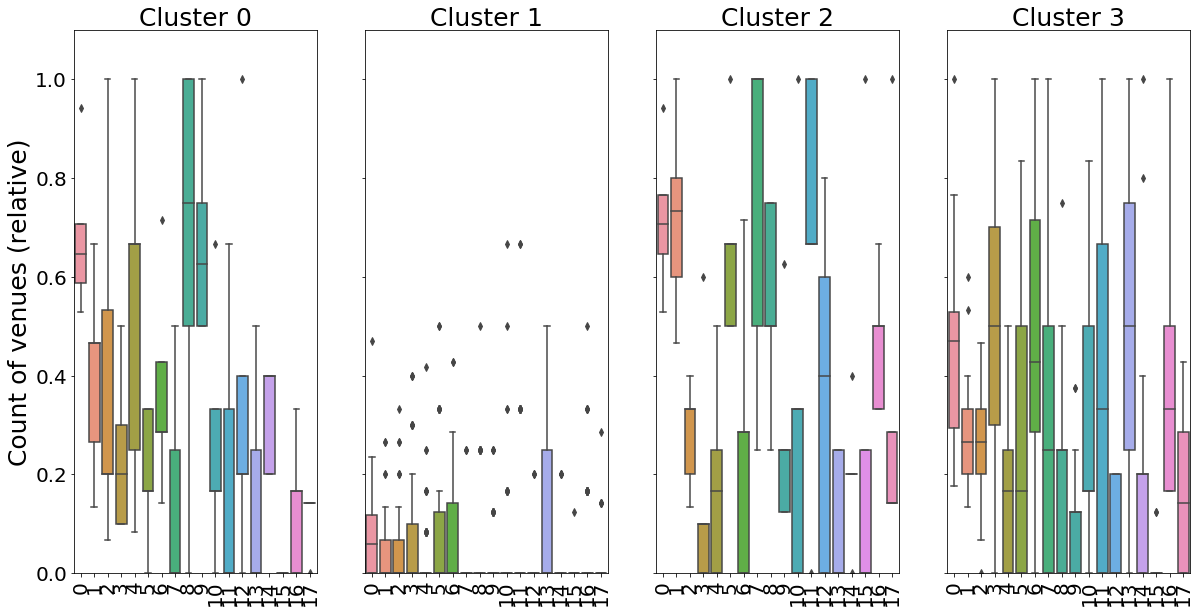

In [35]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = neighborhood_MoreSignificant_cluster_minmax_df[neighborhood_MoreSignificant_cluster_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
    


plt.show()

### Comparing with the reference:

In [36]:
Z = station_MoreSignificant.values  #[:,4:]
reference_dataset = MinMaxScaler().fit_transform(Z)

In [37]:
reference_dataset
reference_df = pd.DataFrame(reference_dataset)
#cluster_df.columns = [c[0] for c in categories_list]
reference_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.583333,0.428571,0.454545,0.5,0.500,1.0,0.000000,0.333333,0.5,0.000000,0.333333,0.50,0.0,1.0,0.0,0.166667,1.000000,1.0
1,0.000000,0.000000,0.000000,0.0,0.250,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.375000,0.142857,1.000000,0.6,0.000,0.0,0.428571,0.666667,0.0,0.000000,0.666667,0.00,1.0,0.5,0.0,0.000000,0.333333,0.0
3,0.208333,0.071429,0.545455,1.0,0.375,0.4,0.571429,0.666667,0.0,0.833333,0.000000,0.25,0.5,1.0,1.0,0.166667,0.333333,0.0
4,0.541667,0.714286,0.363636,0.3,0.500,0.4,0.142857,1.000000,1.0,0.166667,0.666667,0.00,1.0,0.5,0.5,1.000000,0.333333,0.0


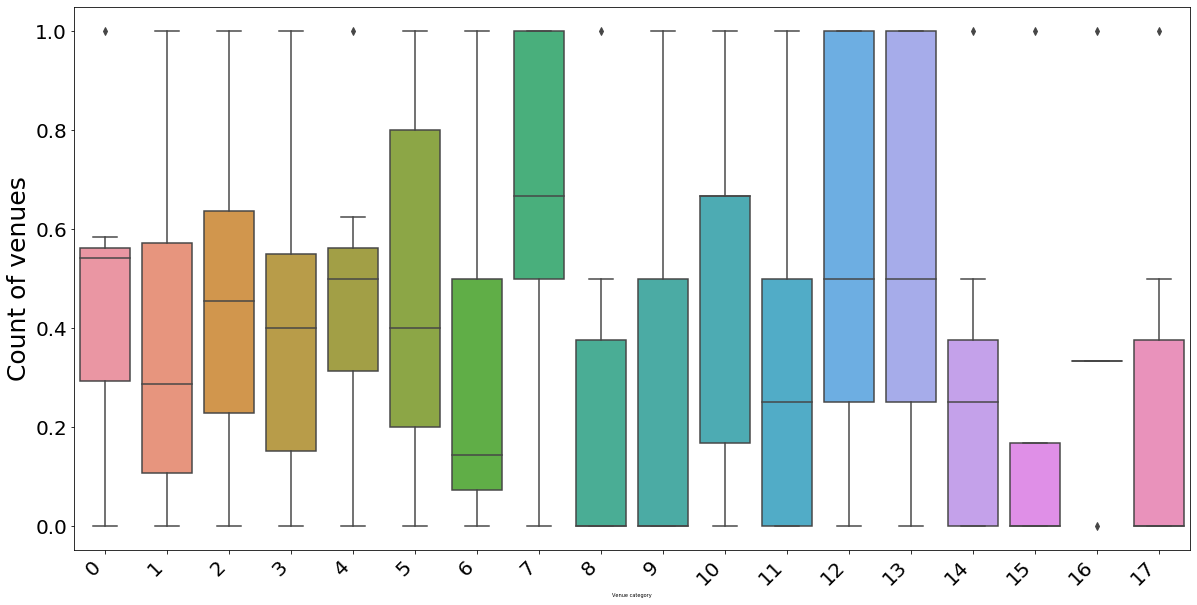

In [38]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = reference_df)
ax.set_ylabel('Count of venues', fontsize=25)

ax.set_xlabel('Venue category', fontsize=5)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

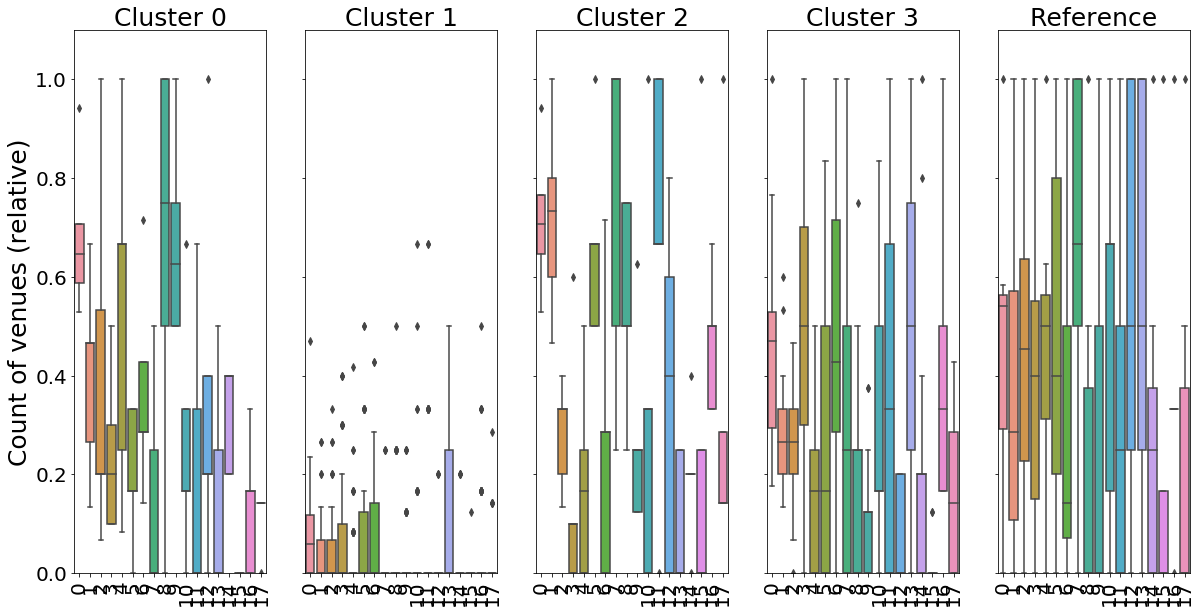

In [39]:

fig, axes = plt.subplots(1,kclusters + 1, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')



axes[4].set_ylim(0,1.1)
axes[4].xaxis.set_label_position('top')
axes[4].set_xlabel('Reference', fontsize=25)
axes[4].tick_params(labelsize=20)
plt.sca(axes[4])
plt.xticks(rotation='vertical')
sns.boxplot(data = reference_df, ax=axes[4])

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = neighborhood_MoreSignificant_cluster_minmax_df[neighborhood_MoreSignificant_cluster_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
    


plt.show()

Visually we can observe that Cluster 0 is the one that presents the greatest similarity to the Reference. This will be the "Best" Category.

Next, Cluster 2 follows in similarity. This will be the "Good" category.

Cluster 3 has values well below the reference. This will be the "Regular" category.

Finally, Cluster 1 is the one that hardly matches the reference. This will be the "Bad" category

We rearrange the categories with this criterion:

In [40]:
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:1,1:3,2:0,3:2}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]
    
neighborhood_MoreSignificant_cluster_minmax_df['Cluster'] = kmeans_labels

And we plot again:

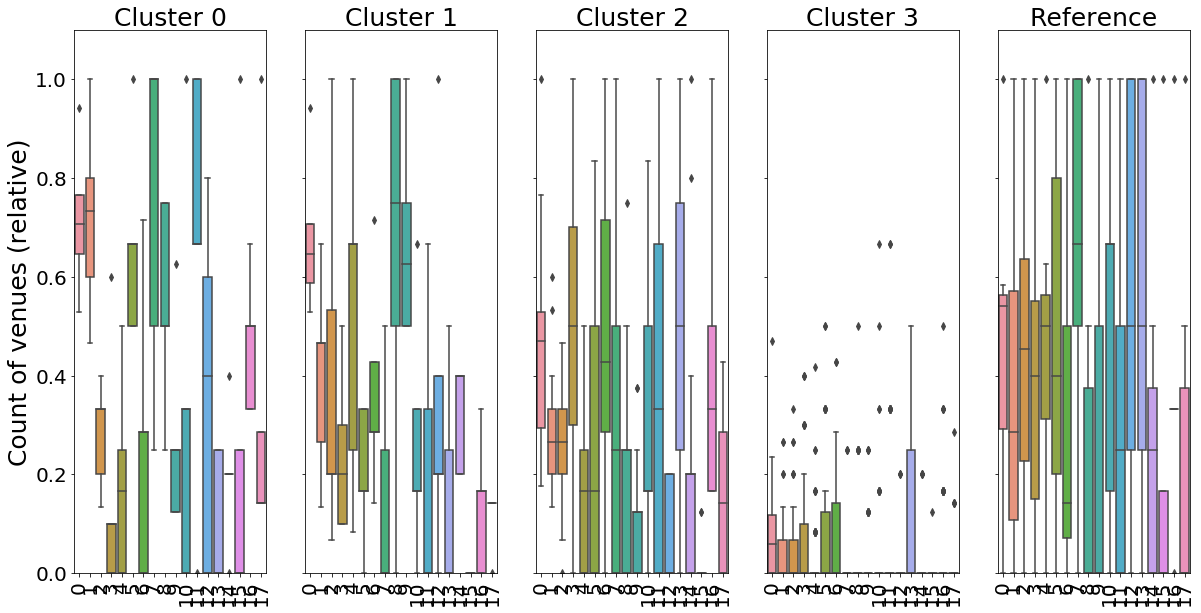

In [41]:
fig, axes = plt.subplots(1,kclusters + 1, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')



axes[4].set_ylim(0,1.1)
axes[4].xaxis.set_label_position('top')
axes[4].set_xlabel('Reference', fontsize=25)
axes[4].tick_params(labelsize=20)
plt.sca(axes[4])
plt.xticks(rotation='vertical')
sns.boxplot(data = reference_df, ax=axes[4])

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = neighborhood_MoreSignificant_cluster_minmax_df[neighborhood_MoreSignificant_cluster_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])
    


plt.show()

## Map the data. 

In [42]:
import folium

latitudMadrid=40.418889
longitudMadrid=-3.691944

#create map of madrid with all charging stations
map_madrid_cluster = folium.Map(location=[latitudMadrid, longitudMadrid], zoom_start=10)

In [43]:
listado = pd.read_csv('barrios.csv')
listado.head()

,Name,link,Type,latitude,longitude
0,Centro (Madrid),/wiki/Centro_(Madrid),Distrito,40.415347,-3.707371
1,Palacio (Madrid),/wiki/Palacio_(Madrid),Barrio,40.415000,-3.713333
2,Embajadores (Madrid),/wiki/Embajadores_(Madrid),Barrio,40.408889,-3.699722
3,Cortes (Madrid),/wiki/Cortes_(Madrid),Barrio,40.414167,-3.698056
4,Justicia (Madrid),/wiki/Justicia_(Madrid),Barrio,40.423889,-3.696389


In [44]:
listadobarrios=listado[listado['Type']=='Barrio'].reset_index()
listadoDistritos=listado[listado['Type']=='Distrito'].reset_index()

In [45]:
import xml.etree.ElementTree as ET

pathtokml='estacion de carga de vehiculos electrico madrid.kml'
tree=ET.parse(pathtokml)
places=tree.findall('.//{http://www.opengis.net/kml/2.2}Placemark')
places[0].findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[0]
places[0].findall('.//{http://www.opengis.net/kml/2.2}name')[0].text.split(',')[0]
elementos=[]
for place in places:
    latitud=float(place.findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[1])
    longitud=float(place.findall('.//{http://www.opengis.net/kml/2.2}coordinates')[0].text.split(',')[0])
    nombre=place.findall('.//{http://www.opengis.net/kml/2.2}name')[0].text.split(',')[0]
    direccion=place.findall('.//{http://www.opengis.net/kml/2.2}address')[0].text.split(',')[0]
    elementos.append([nombre,direccion,latitud,longitud])

stations=pd.DataFrame(elementos) 
stations.columns=['Name','Address','latitude','longitude']
stations

,Name,Address,latitude,longitude
0,Punto de recarga de Vehículos Eléctricos,28046 Madrid,40.431880,-3.689155
1,Enchufauto,Calle de Diego de León,40.434853,-3.678520
2,Recarga eléctrica de coches y motos,Calle de Alfonso XII,40.419270,-3.688927
3,Recarga eléctrica de coches,Paseo de la Castellana,40.458343,-3.689345
4,Recarga eléctrica de coches,Calle de los Chulapos,40.407397,-3.720168
5,Punto de Carga para Vehiculo Eléctrico Sta. En...,Calle de Sta Engracia,40.438250,-3.700276
6,Recarga eléctrica de coches y motos,Calle de Goya,40.424696,-3.671250
7,Punto de Carga Vehículos Eléctricos,Parking ifema,40.464751,-3.618176
8,Punto de recarga Vehículo Eléctrico,Calle de San Bernardo,40.427178,-3.706448


To represent the clusters on the map, we must first add the latitude and longitude of each neighborhood.

In [46]:
neighborhood_MoreSignificant_cluster_minmax_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Cluster,Neighbourhood
0,0.176471,0.066667,0.133333,0.4,0.166667,0.166667,0.142857,0.0,0.0,0.000,0.000000,0.333333,0.0,0.25,0.0,0.0,0.333333,0.0,3,Adelfas
1,0.117647,0.000000,0.000000,0.0,0.000000,0.333333,0.142857,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,3,Aeropuerto (Madrid)
2,0.058824,0.066667,0.133333,0.1,0.166667,0.166667,0.000000,0.0,0.0,0.250,0.166667,0.000000,0.0,0.25,0.2,0.0,0.166667,0.0,3,Alameda de Osuna
3,0.529412,0.666667,0.066667,0.3,0.250000,0.166667,0.285714,0.0,0.5,0.500,0.666667,0.333333,0.0,0.00,0.2,0.0,0.333333,0.0,1,Almagro (Madrid)
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,3,Almenara (Madrid)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,3,Valverde (Madrid)
125,0.176471,0.000000,0.000000,0.2,0.166667,0.000000,0.000000,0.0,0.5,0.000,0.000000,0.000000,0.0,0.25,0.0,0.0,0.166667,0.0,3,Ventas (Madrid)
126,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,3,Villaverde Alto (Madrid)
127,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,3,Vinateros


Merging both dataframes:

In [47]:
cluster_barrios=pd.merge(left=neighborhood_MoreSignificant_cluster_minmax_df,right=listadobarrios, left_on='Neighbourhood', right_on='Name')

We add a new column with a category label corresponding to each cluster.

In [48]:
cluster_barrios.loc[cluster_barrios['Cluster']==0, 'Group']='The Best'
cluster_barrios.loc[cluster_barrios['Cluster']==1, 'Group']='Good'
cluster_barrios.loc[cluster_barrios['Cluster']==2, 'Group']='Regular'
cluster_barrios.loc[cluster_barrios['Cluster']==3, 'Group']='Bad'
#df1.loc[df1['stream'] == 2, 'feat'] = 10
cluster_barrios

,0,1,2,3,4,5,6,7,8,9,...,17,Cluster,Neighbourhood,index,Name,link,Type,latitude,longitude,Group
0,0.176471,0.066667,0.133333,0.4,0.166667,0.166667,0.142857,0.0,0.0,0.000,...,0.0,3,Adelfas,17,Adelfas,/wiki/Adelfas,Barrio,40.400278,-3.670833,Bad
1,0.117647,0.000000,0.000000,0.0,0.000000,0.333333,0.142857,0.0,0.0,0.000,...,0.0,3,Aeropuerto (Madrid),147,Aeropuerto (Madrid),/wiki/Aeropuerto_(Madrid),Barrio,40.494167,-3.566944,Bad
2,0.058824,0.066667,0.133333,0.1,0.166667,0.166667,0.000000,0.0,0.0,0.250,...,0.0,3,Alameda de Osuna,146,Alameda de Osuna,/wiki/Alameda_de_Osuna,Barrio,40.457222,-3.587778,Bad
3,0.529412,0.666667,0.066667,0.3,0.250000,0.166667,0.285714,0.0,0.5,0.500,...,0.0,1,Almagro (Madrid),47,Almagro (Madrid),/wiki/Almagro_(Madrid),Barrio,40.431667,-3.694167,Good
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,...,0.0,3,Almenara (Madrid),40,Almenara (Madrid),/wiki/Almenara_(Madrid),Barrio,40.471290,-3.695505,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,...,0.0,3,Valverde (Madrid),56,Valverde (Madrid),/wiki/Valverde_(Madrid),Barrio,40.505833,-3.685833,Bad
125,0.176471,0.000000,0.000000,0.2,0.166667,0.000000,0.000000,0.0,0.5,0.000,...,0.0,3,Ventas (Madrid),105,Ventas (Madrid),/wiki/Ventas_(Madrid),Barrio,40.428333,-3.657500,Bad
126,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.0,0.000,...,0.0,3,Villaverde Alto (Madrid),122,Villaverde Alto (Madrid),/wiki/Villaverde_Alto_(Madrid),Barrio,40.347778,-3.711667,Bad
127,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125,...,0.0,3,Vinateros,103,Vinateros,/wiki/Vinateros,Barrio,40.403056,-3.640278,Bad


And finally, we place each point on the map with a color code: <ol> <li> The Best: Red <li> Good: Green <li> Regular: orange <li> Bad: black

In [49]:
#add markers
for i, Neighbourhood, latitude, longitude, cluster, Group in zip(cluster_barrios.index,
                                        cluster_barrios['Neighbourhood'],
                                        cluster_barrios['latitude'],
                                        cluster_barrios['longitude'],
                                        cluster_barrios['Cluster'],
                                        cluster_barrios['Group']):
   #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['red','green','orange','black']
    #Calculate top 3 categories for each station
    station_series = cluster_barrios.iloc[i]
    popup='<b>{}</b><br>Cluster {}'.format(
        Neighbourhood,
        Group
        )
    folium.CircleMarker(
        location=[latitude,longitude],
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(map_madrid_cluster)
    

map_madrid_cluster



## Results

Here is how we can characterize the clusters by looking at venue scores
- Cluster 0 (Red) has consistently high scores for all venue categories as seen in the reference pattern of the existing charging stations.
- Cluster 1 (Green) has lower score for all venue categories than previos cluster. 
- Cluster 2 (Orange) has lowest marks for all venue categories.  
- Cluster 3 (Red) barely coincide with the selected venue categories.

Cluster 0 is the best option because it its the most similar to the current locations of the selected charging stations.

Plotting the clusters on a map shows us that
- Cluster 0 corresponds to the large commercial districts of the city's commercial center.
- Group 1 is also in the center but in neighborhoods with smaller capacity roads.
- Groups 2 and 3 correspond to more peripheral neighborhoods.



## Discussion

To be fair, Foursquare data does not cover everything. The largest number of places are in the categories of Food, shops and services. 

In a more complete study, other indicators of the movement of people and vehicles should be included, but as a first approximation the results appear to be consistent.

## Conclusion

In this study, we have taken data on the environment of electric vehicle charging stations. They have been used as a pattern of comparison with the neighborhoods of Madrid, where there are no facilities of this type to establish a division of the city in areas where it is more interesting to install a new charging station.

Four groups have been established to classify the neighborhoods from the best area to the worst, and the geographic results show a great correlation with the current location of the existing facilities, so the validity of this method for locating suitable locations is accepted because wecan answer the questions we had raised:
- What is best location in Madrid for stations charging electrical vehicles? The Cluster 0 o "The Best" locations.
- Which areas have potential station charging electrical vehicles market? The Cluster 1 or "Good" locations.

Additional socio-economic factors that could better characterize neighborhoods have not been taken into account. Future developments in this field may provide more accurate results.